# Regressão Linear

<img src="https://i.imgur.com/6mPgnyJ.png" width=500>

O intuito do modelo de regressão linear é definirmos uma reta que melhor se ajusta aos dados. <br>


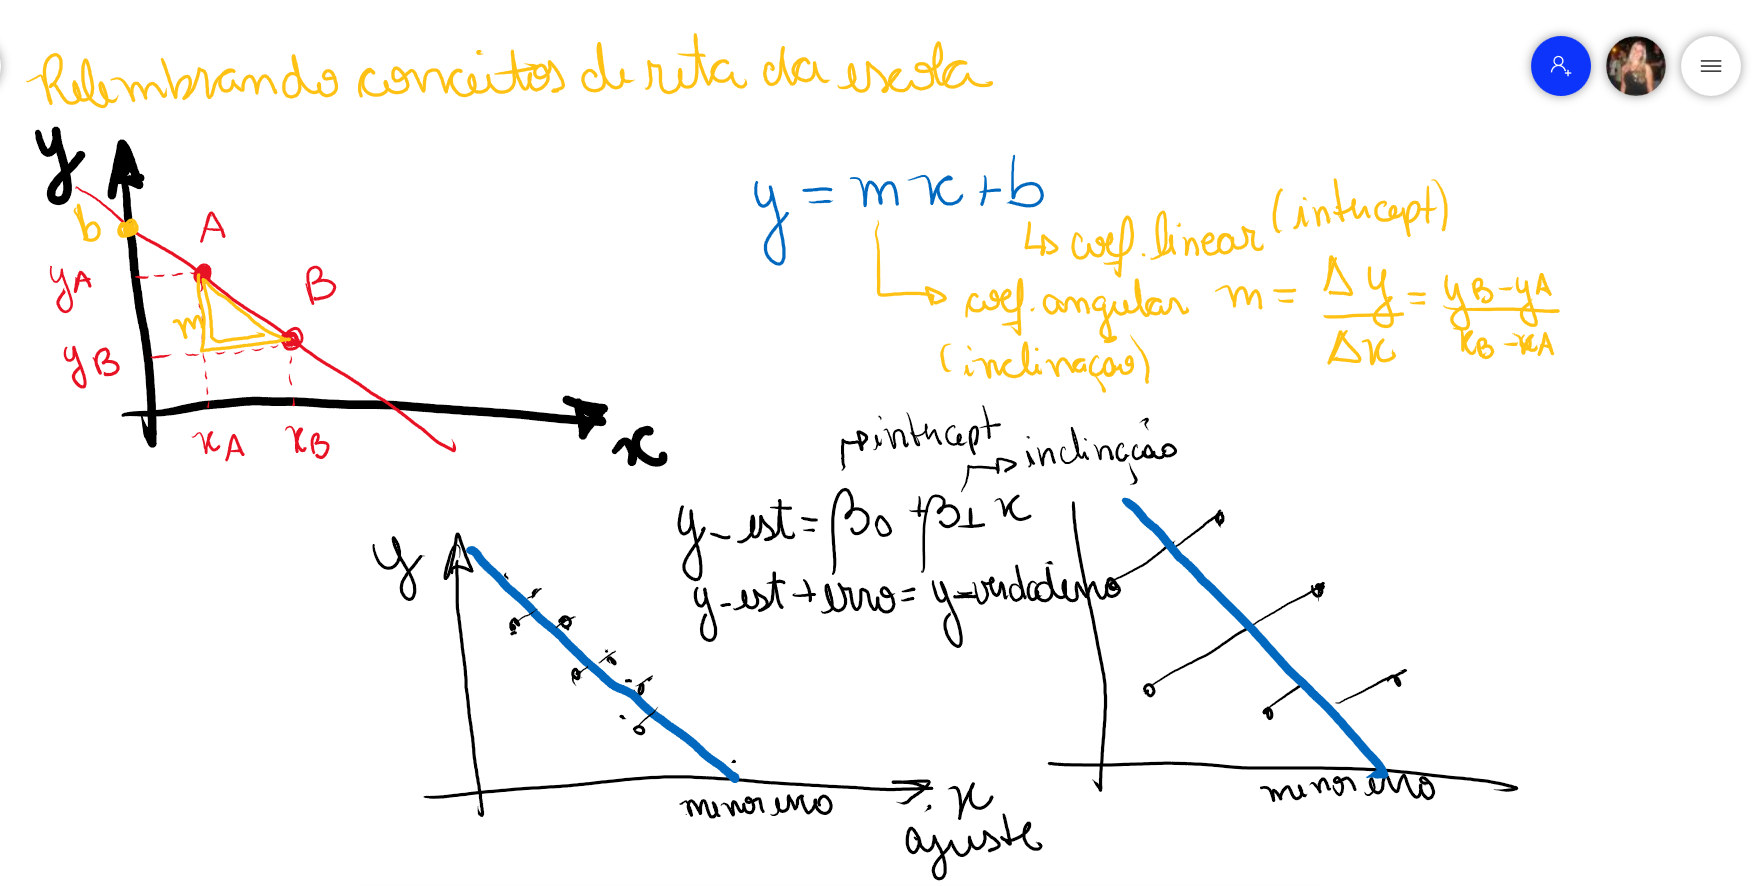

---

## 1. Correlação vs Regressão Linear

| Correlação | Regressão |
|:----------:|:---------:|
| Mede o grau de relação entre duas variáveis | Uma variável afeta a outra |
| Grau de interelação | Baseada em causalidade (~Relação~ → Causa e efeito) |
| $\rho(x,y)$ = $\rho(y,x)$ | Unidirecional |
| Único ponto | Linha |

### $\Rightarrow$ Correlação não implica em causalidade!

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # tema

## 2. Regressão Linear: Conceitos iniciais

**Exemplo 1**

In [2]:
x = np.arange(6)
y = x

In [3]:
x

array([0, 1, 2, 3, 4, 5])

In [4]:
y

array([0, 1, 2, 3, 4, 5])

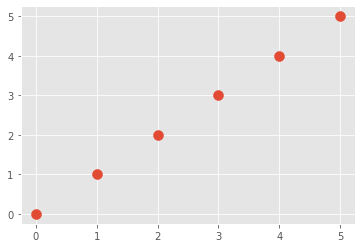

In [5]:
# Visualização
plt.scatter(x, y, s=100)

### Equação da reta de regressão
y = b0 + b1 * x

ou 

y = beta0 + beta1 * x

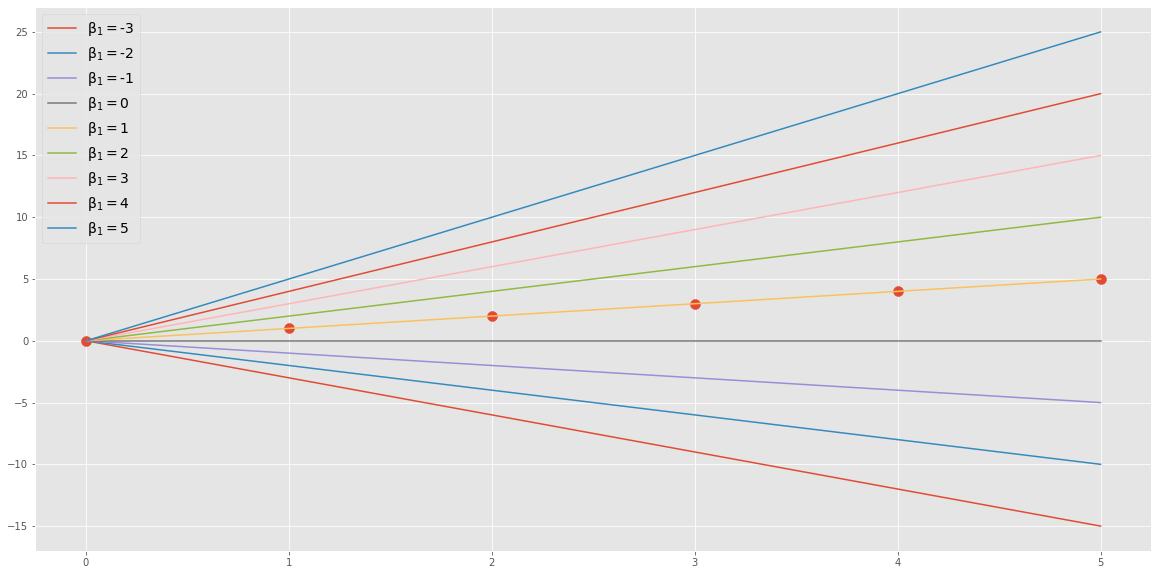

In [7]:
# Coeficiente x EQM
b0 = 0

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=100)

coeficiente_erro = []

for b1 in range(-3, 6):
    y_est = b0 + b1 * x
    plt.plot(x, y_est, label='$\\beta_1 = $' + str(b1))
    
    erro = sum((y_est - y)**2) / 6 # Erro médio quadrático
    
    coeficiente_erro.append([b1, erro])
    
plt.legend(fontsize=14)

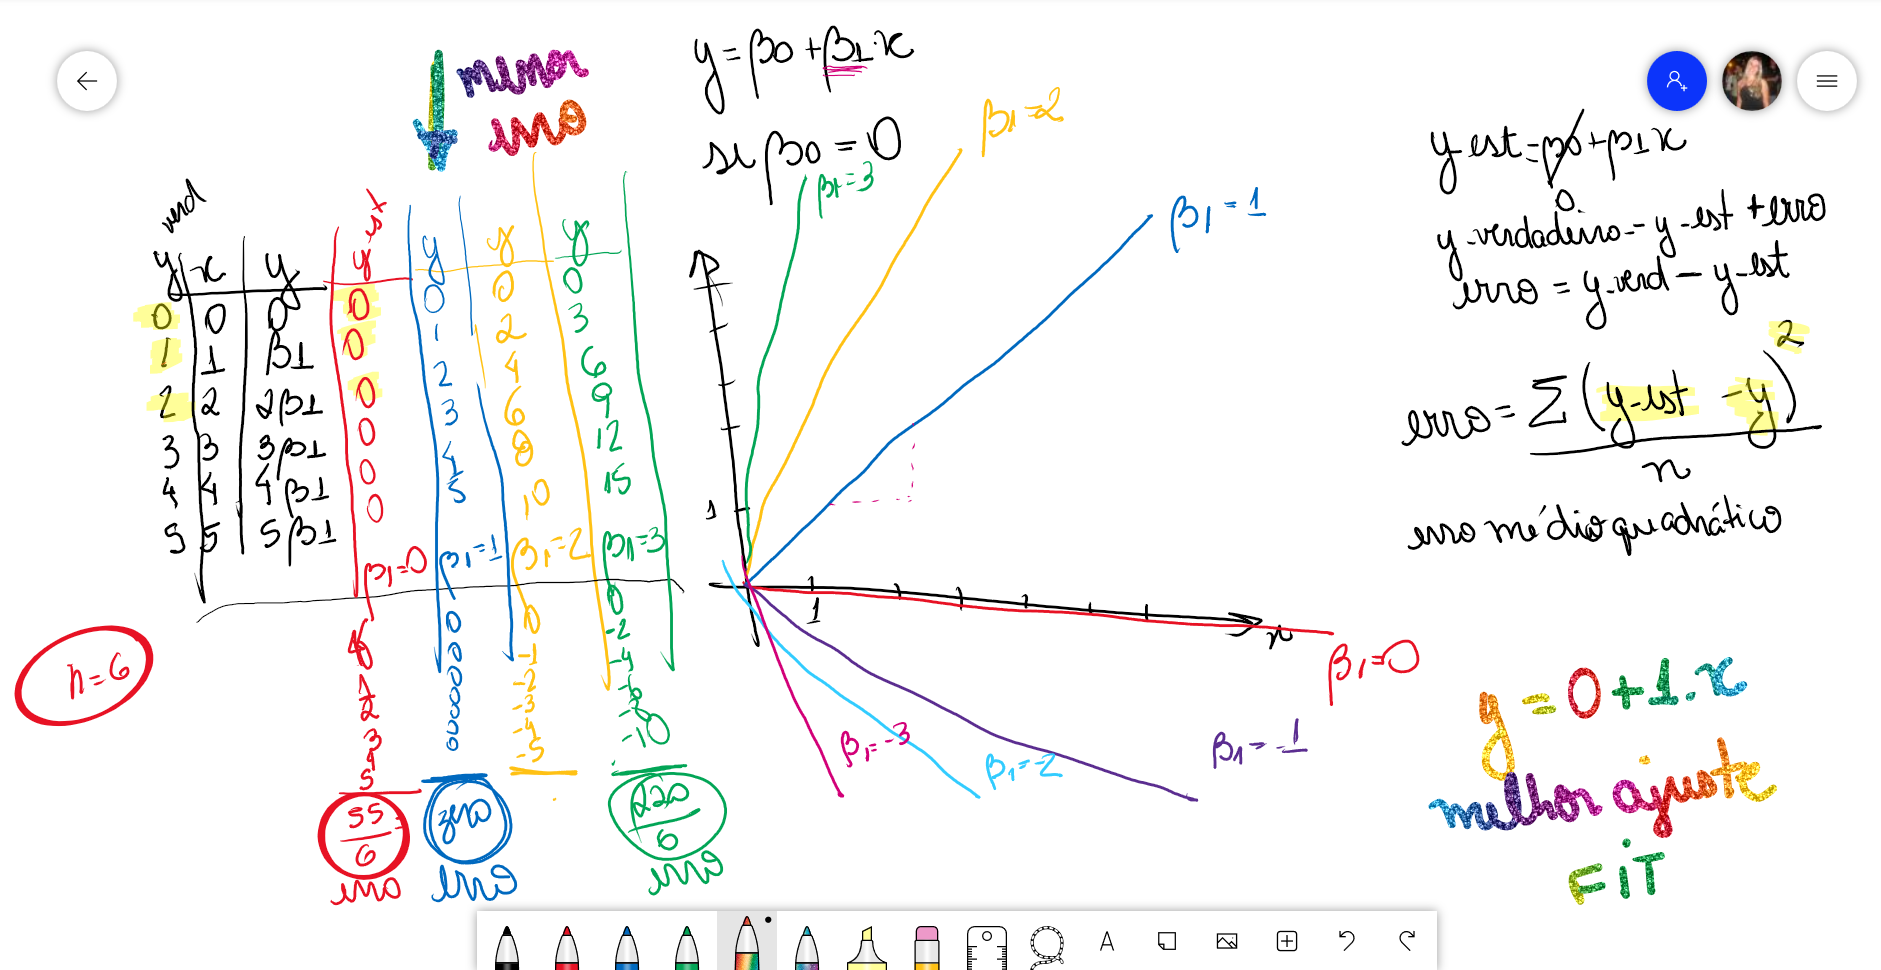

Dúvida

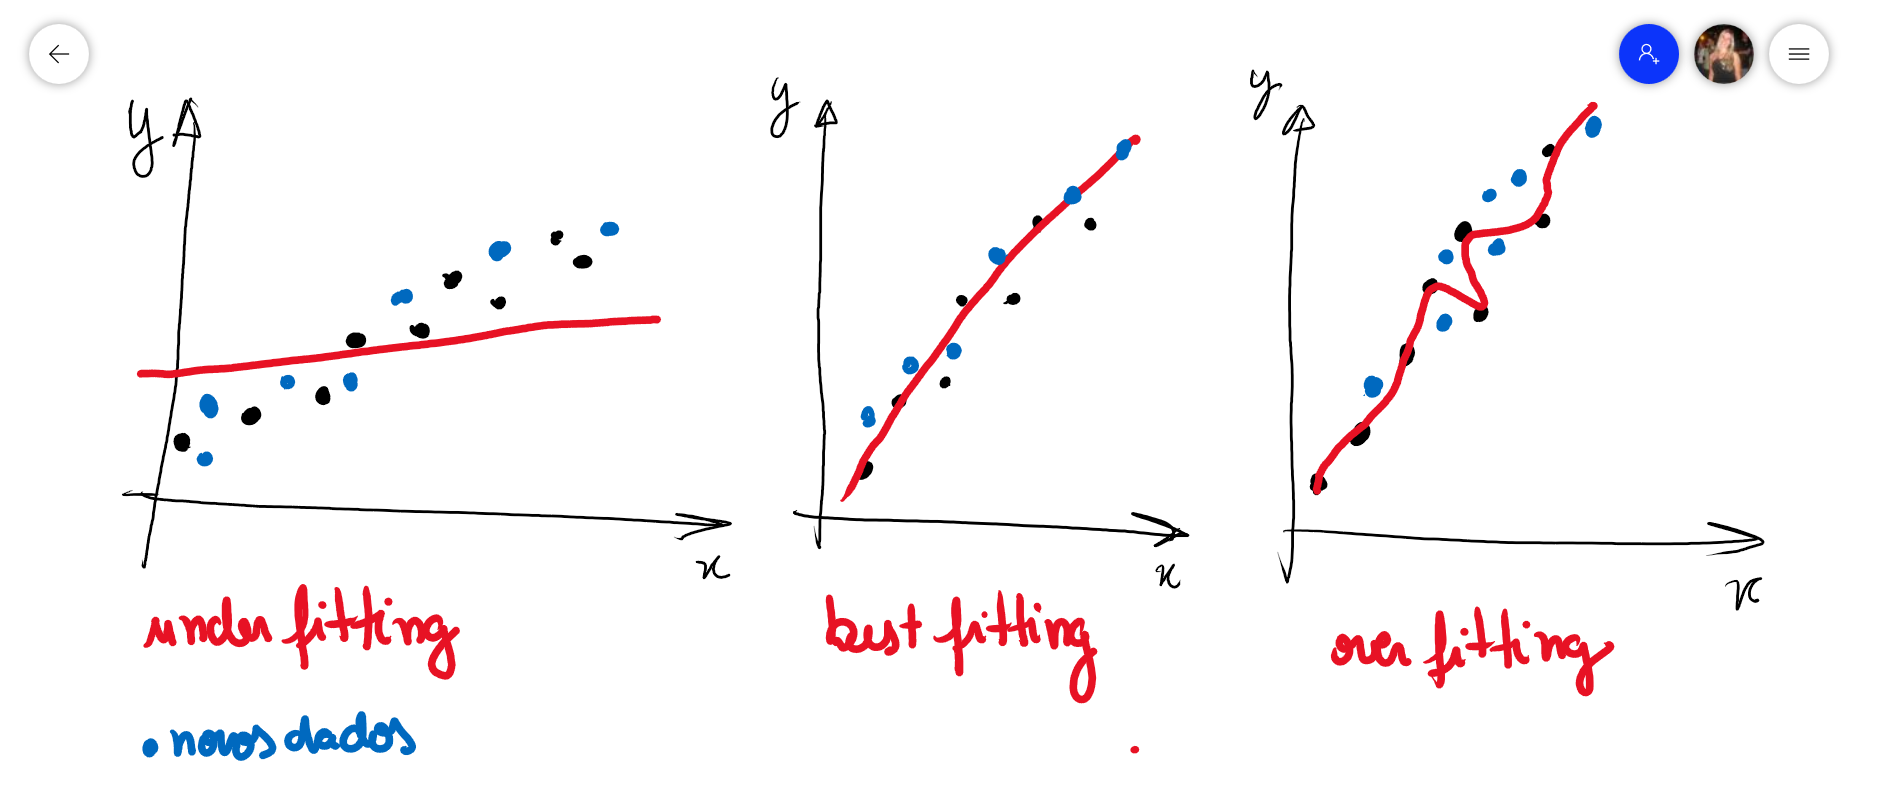

In [8]:
coeficiente_erro

[[-3, 146.66666666666666],
 [-2, 82.5],
 [-1, 36.666666666666664],
 [0, 9.166666666666666],
 [1, 0.0],
 [2, 9.166666666666666],
 [3, 36.666666666666664],
 [4, 82.5],
 [5, 146.66666666666666]]

Para o b1 = 0, o erro é de 9.16  
Para o b1= 1, o erro é de 0  
para o b1 = 2, o erro é de 9.16  
para o b1 = 3, o erro é de 36.6

No nosso caso, $y = x$, então, $\beta_0 = 0$, $\beta_1 = 1$.

Pois queremos o menor erro

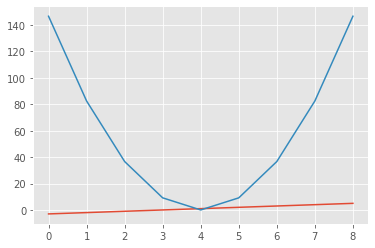

In [9]:
plt.plot(coeficiente_erro)

obs: 4 é o 4º valor

In [11]:
coef_erro = np.array(coeficiente_erro)
coef_erro

array([[ -3.        , 146.66666667],
       [ -2.        ,  82.5       ],
       [ -1.        ,  36.66666667],
       [  0.        ,   9.16666667],
       [  1.        ,   0.        ],
       [  2.        ,   9.16666667],
       [  3.        ,  36.66666667],
       [  4.        ,  82.5       ],
       [  5.        , 146.66666667]])

In [12]:
# valores de y
coef_erro[:,0]

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [13]:
# valores do erro
coef_erro[:,1]

array([146.66666667,  82.5       ,  36.66666667,   9.16666667,
         0.        ,   9.16666667,  36.66666667,  82.5       ,
       146.66666667])

Text(0, 0.5, 'EQM (Erro Médio Quadrático)')

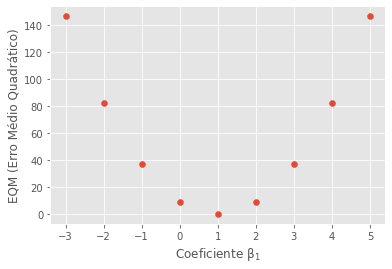

In [14]:
plt.scatter(coef_erro[:,0], coef_erro[:,1])
plt.xlabel('Coeficiente $\\beta_1$')
plt.ylabel('EQM (Erro Médio Quadrático)')

### Calculando os coeficientes $\beta_0$ e $\beta_1$ por meio das equações

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

$\bar{x}$ -> x médio

In [15]:
x

array([0, 1, 2, 3, 4, 5])

In [16]:
y

array([0, 1, 2, 3, 4, 5])

In [17]:
x_mean = x.mean()
y_mean = y.mean()

x_mean, y_mean

(2.5, 2.5)

In [18]:
x - x_mean

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5])

In [19]:
y - y_mean

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5])

In [20]:
(y - y_mean) * (x - x_mean)

array([6.25, 2.25, 0.25, 0.25, 2.25, 6.25])

In [21]:
sum((y - y_mean) * (x - x_mean))

17.5

In [22]:
sum((x - x_mean)**2)

17.5

In [23]:
b1 = sum( (x - x_mean) * (y - y_mean) ) / sum( (x - x_mean)**2 )
b1

1.0

In [24]:
b0 = y_mean - (b1 * x_mean)
b0

0.0

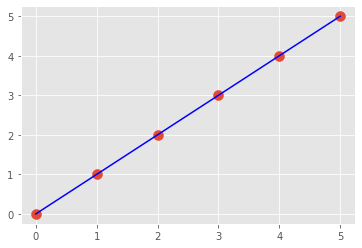

In [25]:
plt.scatter(x, y, s=100)
plt.plot(x, b0 + b1 * x, color='blue')

**Exemplo 2**

In [26]:
# Vamos criar uma sequência de 50 pontos
x = np.arange(0, 50)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [27]:
np.random.randn(50)

array([-0.70368577,  0.01905251, -0.40359784,  0.08878672, -0.110014  ,
        0.34578522, -0.27637531, -0.01062839, -0.22925516, -0.6608938 ,
        0.76578118, -0.26831142, -2.68530681, -1.06128442, -0.06454438,
        1.91431593, -0.29886662, -0.8999469 ,  0.9420307 ,  0.11191927,
        0.61777858,  1.24591108, -0.319574  , -0.57583017,  1.88654325,
       -1.71133903,  0.0039911 ,  1.10685022, -1.42884192,  0.31473095,
       -0.10144755, -1.42019975,  1.28683826, -0.66190419, -0.68108417,
        2.07299835,  1.16475653, -0.46168983, -0.03465038,  2.30401275,
       -0.59038103,  0.41536346,  0.28322146,  0.8365366 ,  0.10788728,
       -0.82093673,  0.99298039, -0.52064212, -0.06758775, -1.63588647])

In [28]:
# Aqui criamos um conjunto de 50 pontos aleatórios
y = np.round(np.abs(np.random.randn(50) * 5), 0)
y

array([ 5.,  3.,  7.,  0.,  1.,  2.,  2.,  0.,  3.,  0.,  1.,  3.,  2.,
        0., 10.,  2.,  7.,  1.,  3.,  2.,  1.,  3.,  9.,  6.,  2.,  0.,
        1.,  6.,  2.,  6.,  2.,  5.,  2.,  4., 10.,  3.,  1.,  0.,  7.,
        5.,  5.,  0.,  0.,  0.,  5.,  5.,  1.,  3.,  3.,  1.])

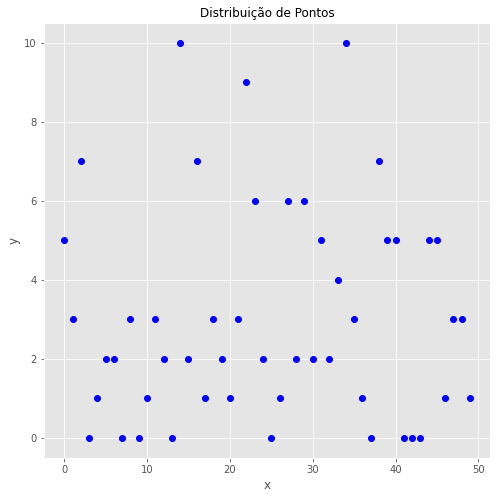

In [29]:
# Vamos ver como se distribuem esses pontos
plt.figure(figsize=(8,8))
plt.plot(x, y, 'bo')
plt.title('Distribuição de Pontos', fontsize= 12)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)
plt.show() 

Para se definir os valores de  $\hat{\beta}_0$ e $\hat{\beta}_1$ a partir do conjunto de dados, usaremos as seguintes relações matemáticas:

$$
\large
\begin{cases}
\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sigma_{xy}}{\sigma_{xx}} = \frac{covar(x, y)}{var(x)}\\
\hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
\end{cases}
$$

$\hat{\beta}$ outra forma de expressar os coeficientes beta estimados

Onde:
- **Covariância** ou variância conjunta, que indica o grau de interdependência entre duas variáveis;
- **Variância** é uma medida de o quão disperso estão os dados, ou seja o quão distante está cada valor desse conjunto do valor médio;

In [30]:
def linear_regression(x, y): 
    # Definindo o tamanho da amostra
    n = np.size(x) 
  
    # Defini as médias e calcula a variancia e covariancia
    m_x, m_y = np.mean(x), np.mean(y) 
    SS_xy = 0
    SS_xx = 0
    for i in range(0,len(x)):
        SS_xy = SS_xy + (x[i]-m_x)*(y[i]-m_y)
        SS_xx = SS_xx + (x[i]-m_x)**2
  
    # calcula os coeficientes de regressão
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return b_0, b_1 

# Função para plotar os dados com a reta da regressão linear
def plot_regression_line(x, y, b): 
    # Calcula o y_pred
    y_pred = b[0] + b[1]*x 
  
    # Plot dos Dados e da Reta
    plt.figure(figsize=(8,8))
    plt.scatter(x, y, color = "b", marker = "o", s = 50) 
    plt.plot(x, y_pred, color = "r") 
    plt.title('Distribuição + Regressão Linear')
    plt.xlabel('x', fontsize = 12) 
    plt.ylabel('y', fontsize = 12) 
    plt.show() 

Estimated coefficients:
b_0 = 2.8894117647058826  
b_1 = 0.006146458583433371


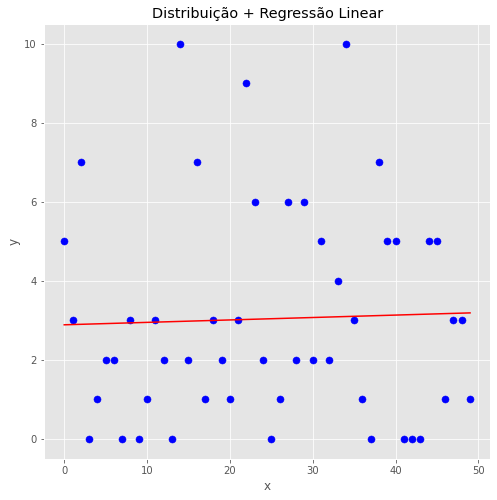

In [31]:
# Calcula os betas para dada regressão linear
b = linear_regression(x, y) 
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
# Plot
plot_regression_line(x, y, b) 

# Métricas de Regressão

Alguma das métricas que podemos utilizar para quantificar a acurácia do modelo, usamos por exemplo raiz quadrada da média dos erros quadráticos RMSE (*root mean squared error*), erro quadrático médio MSE (*mean squared error*) e o erro absoluto médio MAE (*mean absolute error*):<br><br>
$$
RMSE = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
$$

$$
MSE = {\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

$$
MAE = {\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|}
$$

Outra medida importante é o coeficiente R2, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X.<br><br>
$$
R^2 = 1-\frac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}, \quad 0\leq R^2\leq 1
$$

In [32]:
# Cria uma função onde retorna todas as principais métricas para Regressão Linear
def linear_regression_metrics(x, y, b):
    # Definindo o tamanho de n
    n = len(y)

    # Inicializando RSE, MSE e MAE
    RMSE = 0
    MSE = 0
    MAE = 0
    R2_num = 0
    R2_den = 0
    y_mean = np.mean(y)
    # Iterando para todos os valores de y
    for i in range(0, n):
        y_pred = b[0] + x[i]*b[1]
        diff_y = y[i] - y_pred
        RMSE = RMSE + diff_y**2
        MSE = MSE + diff_y**2
        MAE = MAE + np.abs(diff_y)
        R2_num = R2_num + diff_y**2
        R2_den = R2_den + (y[i] - y_mean)**2
    RMSE = (RMSE/(n))**(0.5)
    MSE = MSE/n
    MAE = MAE/n
    R2 = 1 - R2_num/R2_den
    return RMSE, MSE, MAE, R2

In [33]:
RMSE, MSE, MAE, R2 = linear_regression_metrics(x, y, b)
print('Métricas: ')
print('RMSE: ', np.round(RMSE, 3))
print('MSE: ', np.round(MSE, 3))
print('MAE: ', np.round(MAE, 3))
print('R2:  ', np.round(R2, 3))

Métricas: 
RMSE:  2.667
MSE:  7.111
MAE:  2.132
R2:   0.001


**Exemplo 3**

In [36]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [37]:
# para facilitar, vou converter as unidades
df['altura'] = df['Height'] * 2.54 # pol => cm
df['peso'] = df['Weight'] * 0.453592 # libras => kg

In [38]:
df

,Gender,Height,Weight,altura,peso
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499761,93.598619
...,...,...,...,...,...
9995,Female,66.172652,136.777454,168.078536,62.041159
9996,Female,67.067155,170.867906,170.350573,77.504315
9997,Female,63.867992,128.475319,162.224700,58.275377
9998,Female,69.034243,163.852461,175.346978,74.322166


<AxesSubplot:xlabel='altura', ylabel='peso'>

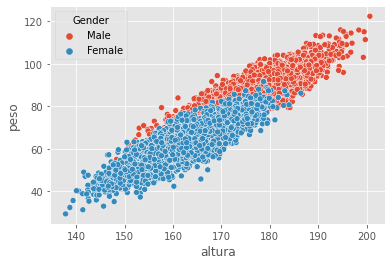

In [40]:
sns.scatterplot(data=df, x='altura', y='peso', hue='Gender')

Qual o peso de uma pessoa com 1.67 metros

1) Criar uma reta com os dados que temos

2) Usar a equação da reta para x=167 estimar o valor do peso y

obs.: Como calcular a equação da reta? usar fórmulas matemáticas, usar machine learning

### Calculando a correlação entre as features

In [41]:
from scipy.stats import pearsonr

In [42]:
pearsonr(df['altura'], df['peso'])

(0.9247562987409146, 0.0)

r, p_value - valor de p bicaudal

O valor p indica aproximadamente a probabilidade de um sistema não correlacionado produzir conjuntos de dados que têm uma correlação de Pearson pelo menos tão extrema quanto a calculada a partir desses conjuntos de dados.

In [43]:
# outra forma de ver a correlação entra as features
df.corr()

,Height,Weight,altura,peso
Height,1.000000,0.924756,1.000000,0.924756
Weight,0.924756,1.000000,0.924756,1.000000
altura,1.000000,0.924756,1.000000,0.924756
peso,0.924756,1.000000,0.924756,1.000000


<AxesSubplot:>

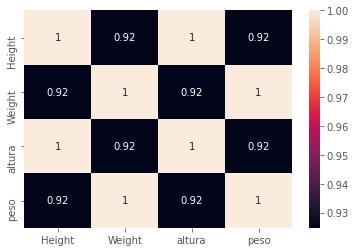

In [45]:
sns.heatmap(df.corr(), annot=True)

### Usando fórmulas matemáticas

- Correlação muito forte: [-1, -0.8] or [0.8, 1]

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [46]:
x = df['altura']
y = df['peso']

In [49]:
x_mean = x.mean()
y_mean = y.mean()

x_mean, y_mean

(168.57360177724604, 73.22805433651767)

In [50]:
b1 = sum( (x - x_mean) * (y - y_mean) ) / sum( (x - x_mean)**2 )
b1 # coeficiente angular da reta

1.3781495809287978

In [51]:
b0 = y_mean - (b1 * x_mean)
b0 # coeficiente linear (intercept)

-159.091584308452

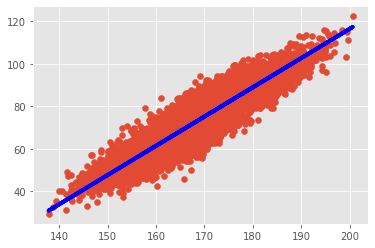

In [52]:
plt.scatter(df['altura'], df['peso'])
plt.plot(x, b0 + b1 * x, color='blue', linewidth=4)

In [53]:
y_est = b0 + b1 * x

In [57]:
y_est

0        99.409894
1        81.679466
2       100.330835
3        92.002701
4        85.529638
           ...    
9995     72.545780
9996     75.676986
9997     64.478318
9998     82.562779
9999     57.744244
Name: altura, Length: 10000, dtype: float64

In [54]:
y

0       109.720985
1        73.622732
2        96.497550
3        99.809504
4        93.598619
           ...    
9995     62.041159
9996     77.504315
9997     58.275377
9998     74.322166
9999     51.550324
Name: peso, Length: 10000, dtype: float64

In [55]:
erro = y - y_est
erro

0       10.311091
1       -8.056735
2       -3.833285
3        7.806803
4        8.068981
          ...    
9995   -10.504621
9996     1.827329
9997    -6.202942
9998    -8.240614
9999    -6.193921
Length: 10000, dtype: float64

In [58]:
df['peso_estimado'] =  y_est
df['erro'] = y - y_est

In [59]:
df

,Gender,Height,Weight,altura,peso,peso_estimado,erro
0,Male,73.847017,241.893563,187.571423,109.720985,99.409894,10.311091
1,Male,68.781904,162.310473,174.706036,73.622732,81.679466,-8.056735
2,Male,74.110105,212.740856,188.239668,96.497550,100.330835,-3.833285
3,Male,71.730978,220.042470,182.196685,99.809504,92.002701,7.806803
4,Male,69.881796,206.349801,177.499761,93.598619,85.529638,8.068981
...,...,...,...,...,...,...,...
9995,Female,66.172652,136.777454,168.078536,62.041159,72.545780,-10.504621
9996,Female,67.067155,170.867906,170.350573,77.504315,75.676986,1.827329
9997,Female,63.867992,128.475319,162.224700,58.275377,64.478318,-6.202942
9998,Female,69.034243,163.852461,175.346978,74.322166,82.562779,-8.240614


### obs: reshape

In [92]:
array = np.ones(25)
array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [93]:
array.reshape(5,5) # 5 linhas e 5 colunas = respeitando a quantidade de 25 elementos

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [95]:
array.reshape(25,1) #25 linhas e 1 coluna 

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [96]:
array.reshape(-1, 1) # 1 coluna e o quanto puder de linhas

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [99]:
array.reshape(5,-1)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

### Usando o scikit-learn

In [62]:
# !pip install sklearn

In [61]:
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [63]:
lr = LinearRegression()

In [64]:
lr

LinearRegression()

In [84]:
# usar os valores em vez da série
df[['altura']].values

# poderia também usar o reshape
df['altura'].values.reshape(-1,1) # mudando o formato do array -> estou usando apenas 1 variável # -1: qualquer valor, 1

array([[187.57142322],
       [174.70603628],
       [188.2396677 ],
       ...,
       [162.22470022],
       [175.34697755],
       [157.33838453]])

In [77]:
X = df['altura'].values.reshape(-1,1) # ou X = df[['altura']].values
y = df['peso'].values

In [102]:
# treinamento do modelo: tem que ser array 

lr.fit(X,y) #calcula os parâmetros do modelo

LinearRegression()

In [103]:
lr.coef_ #coeficiente angular

array([1.37814958])

In [104]:
lr.intercept_ # coeficiente linear (intercept)

-159.09158430845088

### Usando statsmodels

In [105]:
import statsmodels.api as sm

x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

OLS : Ordinary Least Squares <br>
Mínimos Quadrados 

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:42:31   Log-Likelihood:                -31313.
No. Observations:               10000   AIC:                         6.263e+04
Df Residuals:                    9998   BIC:                         6.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -159.0916      0.958   -166.109      0.000    -160.969    -157.214
x1             1.3781      0.006    242.975      0.000       1.367       1.389
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
df.shape

(10000, 7)

## Influência dos Outliers

In [109]:
X = df['altura'].values[:100]
y = df['peso'].values[:100]

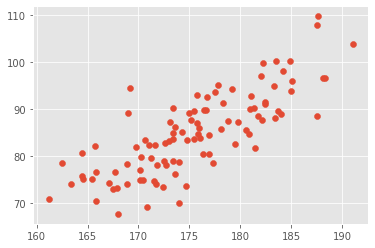

In [110]:
# Visualizando
plt.scatter(X, y)

In [111]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

LinearRegression()

In [112]:
print(lr.coef_[0])
print(lr.intercept_)

1.0449527098060838
-98.52075866207376


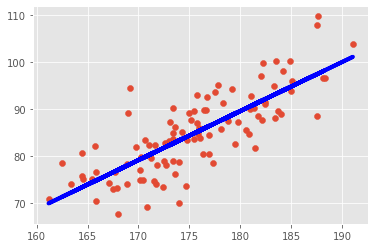

In [113]:
plt.scatter(X, y)
plt.plot(X, lr.intercept_ + lr.coef_[0] * X, color='blue', linewidth=4)

In [114]:
lr.score(X.reshape(-1, 1), y)

0.6214261131940761

### Modelo com a presença dos outliers

In [115]:
X2 = np.append(X, [150, 140, 173])
y2 = np.append(y, [200, 100, 250])

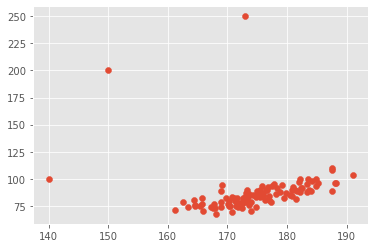

In [116]:
plt.scatter(X2, y2)

In [117]:
lr2 = LinearRegression() # Modelo com os outliers
lr2.fit(X2.reshape(-1, 1), y2)
print(lr2.coef_[0])
print(lr2.intercept_)

0.13487778780562082
64.05035131391784


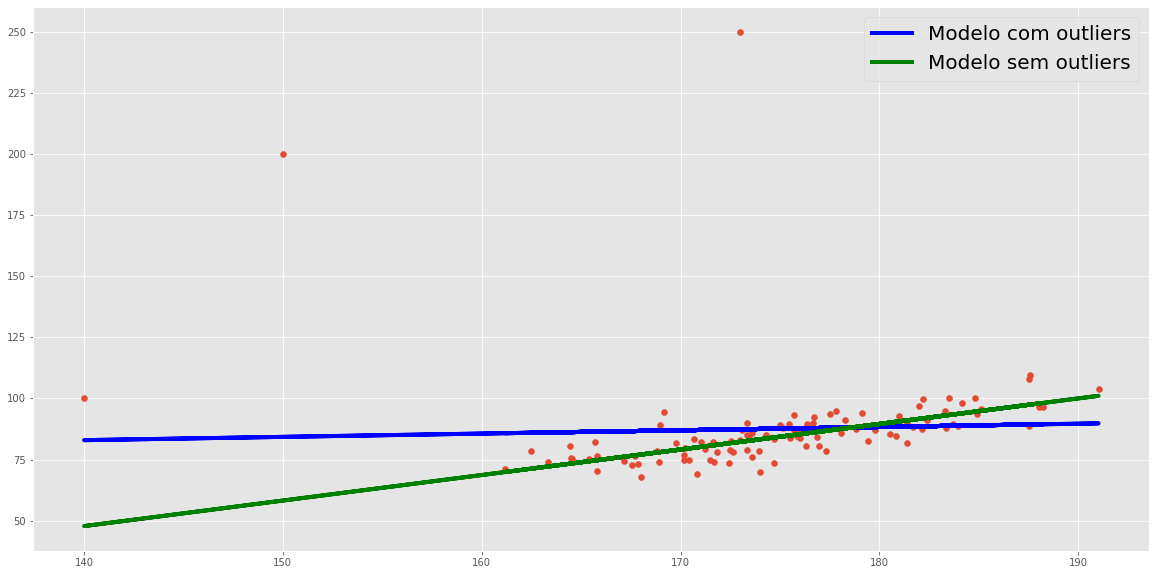

In [118]:
plt.figure(figsize=(20, 10))

# plot de dispersão dos dados originais com os 3 outliers
plt.scatter(X2, y2)

# plot da reta de regressão do modelo treinado com os dados + outliers
plt.plot(X2, lr2.intercept_ + lr2.coef_[0] * X2, color='blue', linewidth=4, label='Modelo com outliers')
plt.plot(X2, lr.intercept_ + lr.coef_[0] * X2, color='green', linewidth=4, label='Modelo sem outliers')

plt.legend(fontsize=20)

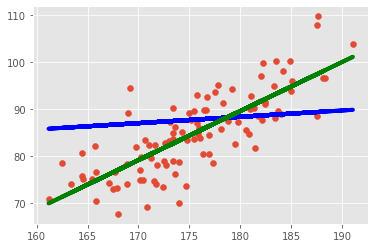

In [119]:
# plot de dispersão dos dados originais com os 3 outliers
plt.scatter(X, y)

# plot da reta de regressão do modelo treinado com os dados + outliers
plt.plot(X, lr2.intercept_ + lr2.coef_[0] * X, color='blue', linewidth=4, label='Modelo com outliers')
plt.plot(X, lr.intercept_ + lr.coef_[0] * X, color='green', linewidth=4, label='Modelo sem outliers')

## Resíduos

1. Não devem ser correlacionados

2. Ter média zero

3. Distribuição normal dos resíduos

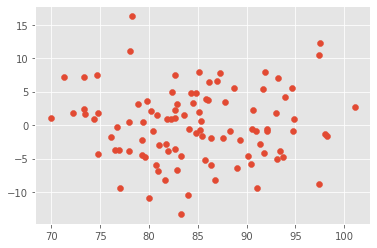

In [122]:
# Sem outliers
y1_est = lr.intercept_ + lr.coef_[0] * X # sem outliers
residuos = y - y1_est



plt.scatter(y1_est, residuos)

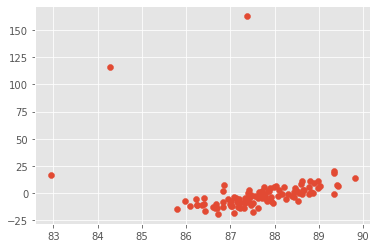

In [124]:
# Com outliers
y2_est = lr2.intercept_ + lr2.coef_[0] * X2 # sem outliers
residuos2 = y2 - y2_est



plt.scatter(y2_est, residuos2)

In [125]:
# sem outlier
residuos.mean()

3.467448550509289e-14

In [126]:
# com outlier
residuos2.mean()

1.4072885251947615e-14

In [127]:
from scipy.stats import normaltest

In [129]:
normaltest(residuos) # sem outliers

NormaltestResult(statistic=0.9490854261141337, pvalue=0.6221695014128703)

<AxesSubplot:ylabel='Count'>

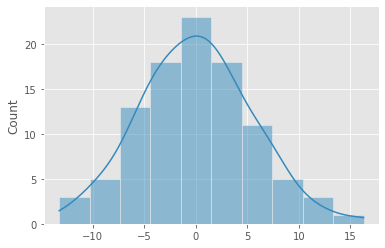

In [131]:
sns.histplot(residuos, kde=True) # sem outliers

In [133]:
normaltest(residuos2) # com outliers

NormaltestResult(statistic=156.8646550078932, pvalue=8.655117381782701e-35)

<AxesSubplot:ylabel='Count'>

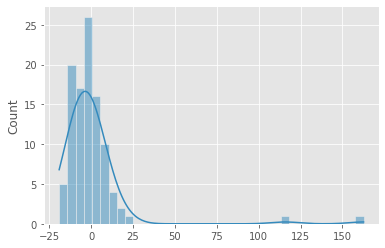

In [132]:
sns.histplot(residuos2, kde=True) # com outlier